# ObsID : 0945060134, SRCNUM : 1, Instru : EPN
Not on Simbad.

## ESASky
https://sky.esa.int/esasky/?target=53.59466666666666%20-28.902777777777782&hips=DSS2+color&fov=1&projection=SIN&cooframe=J2000&sci=true&lang=fr

There is no EPIC Stack pointer on this source because it is not updated yet as the source is too new.

``2MASS``
- Name : 03342264-2854082
- RA : 03h 34m 22.642s
- DEC : -28° 54' 08.24"

``GAIA``
- Designation : DR3 5057101614813827200
- RA : 03h 34m 22.626s
- DEC : -28° 54' 08.62"
- Parallax : 2.941 mas
- G : 19.6951

In [1]:
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import numpy as np

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

plt.rcParams['figure.figsize'] = [12,7]

## Fit statistic

In [2]:
Fit.statMethod = "chi"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4

Default fit statistic is set to: Chi-Squared
   This will apply to all current and newly loaded spectra.
Parameter delta values for fits will now be 0.0001 * parValue


The expected reduce Chi-squared value of a perfect fit is **≈ 1** with: ``reduce Chi-squared = Chi-squared/(n_bins-n_parameters)``.

## Load files

In [3]:
AllData.clear()
spec = Spectrum(glob.glob('P*PNS*SRSPEC*.FTZ')[0])


1 spectrum  in use
 
Spectral Data File: P0945060134PNS003SRSPEC0001.FTZ  Spectrum 1
Net count rate (cts/s) for Spectrum:1  2.673e-02 +/- 2.181e-03 (72.8 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-14
  Telescope: XMM Instrument: EPN  Channel Type: PI
  Exposure Time: 7820 sec
 Using fit statistic: chi
 Using Background File                P0945060134PNS003BGSPEC0001.FTZ
  Background Exposure Time: 7820 sec
 Using Response (RMF) File            epn_e3_ff20_sdY6.rmf for Source 1
 Using Auxiliary Response (ARF) File  P0945060134PNS003SRCARF0001.FTZ



In [4]:
print(f"Number of counts = {2.673e-02*7820} cts")

Number of counts = 209.0286 cts


The number of counts is higher than 100 cts, indicating that the Chi-squared is a good fit statistic choice.

## Plot spectrum

In [5]:
Plot.xAxis="keV"
Plot.device = "/xs"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.00001 0.05")
Plot("data")
spec.ignore("**-0.2 12.0-**")

      No channels ignored (no channels in specified range)
     1 channels (14) ignored in spectrum #     1



(-0.5, 856.5, 651.5, -0.5)

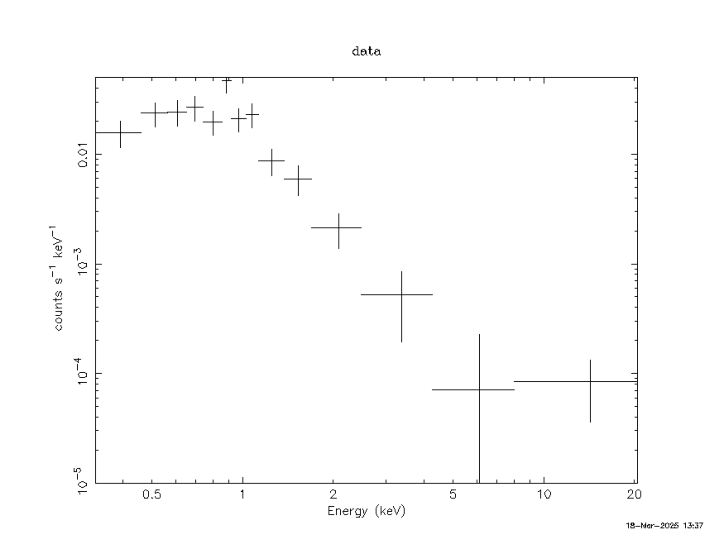

In [6]:
img = plt.imread(glob.glob('*Spectrum.png')[0])
plt.imshow(img)
plt.axis('off')

### Black body model
There are 3 parameters in the ``tbabs*bbody`` model. Here, Chi-squared = 13.7196 using 13 bins, so the **reduce Chi-squared = 1.37196**. The value is close to 1 meaning it is a good fit.

In [7]:
AllModels.clear()
mo = Model("tbabs*bbody")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bbody = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.

Fit statistic  : Chi-Squared              3.203250e+12     using 13 bins.

Te

(-0.5, 859.5, 664.5, -0.5)

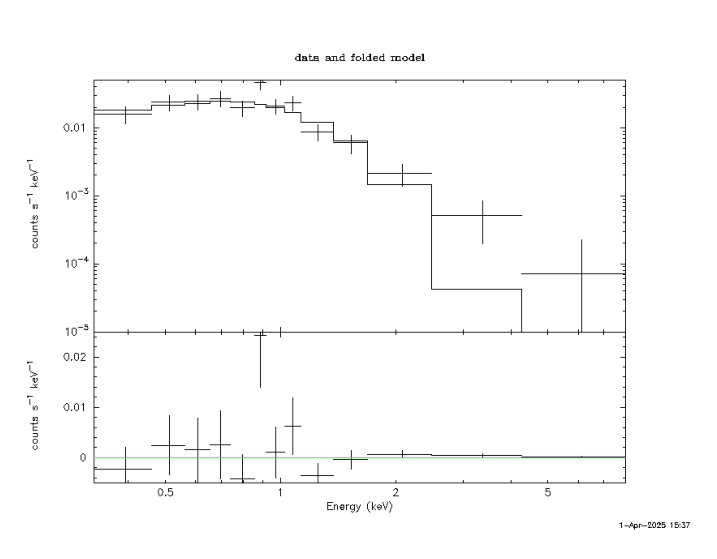

In [8]:
img = plt.imread(glob.glob('*Spectrum_bbody.png')[0])
plt.imshow(img)
plt.axis('off')

### Bremsstrahlung model
There are 3 parameters in the ``tbabs*bremss`` model. Here, Chi-squared = 12.4825 using 13 bins, so the **reduce Chi-squared = 1.24825**. The value is close to 1 meaning it is a good fit.

The value of the reduce Chi-squared is the third closest to 1.

In [9]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bremss = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              7.299015e+10     using 13 bins.

Test statistic : Chi-Squared              7.299015e+10     using 13 bins.
 Null hypothesis probability of 0.000000e+00 with 10 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
138.777      3.29836      -2      0.306692       27.1175   7.09435e-06
96.2167      491093        0     0.0181316       3.17626   7.41235e-06
63.2308      1.29143e+06  -1    0.00873650      0.728152   2.33824e-05


(-0.5, 855.5, 660.5, -0.5)

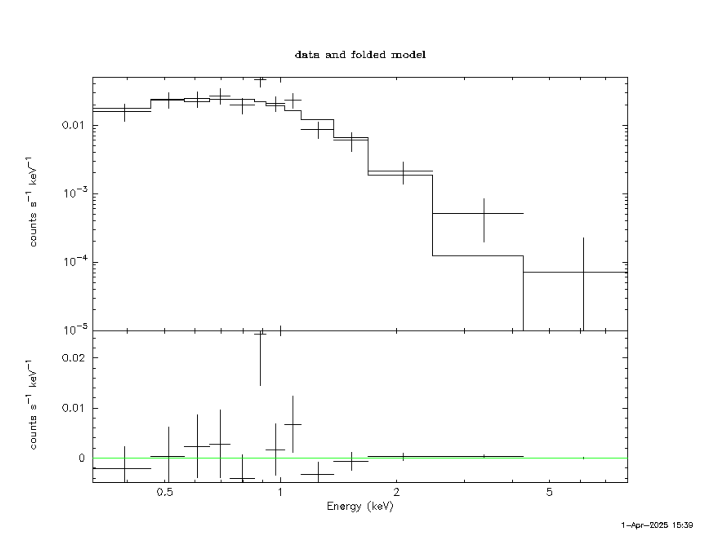

In [10]:
img = plt.imread(glob.glob('*Spectrum_bremss.png')[0])
plt.imshow(img)
plt.axis('off')

### Apec model
There are 4 parameters in the ``tbabs*apec`` model. Here, Chi-squared = 48.8934 using 13 bins, so the **reduce Chi-squared = 5.4326**. The value is far from 1 meaning it is a bad fit.

In [11]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_apec = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : Chi-Squared              7.671661e+09     using 13 bins.

Test statistic : Chi-Squared              7.671661e+09     using 13 bins.
 Null hypothesis probability of 0.000000e+00 with 10 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
52.8402      14.0051      -3      0.628032      0.733313   

(-0.5, 854.5, 654.5, -0.5)

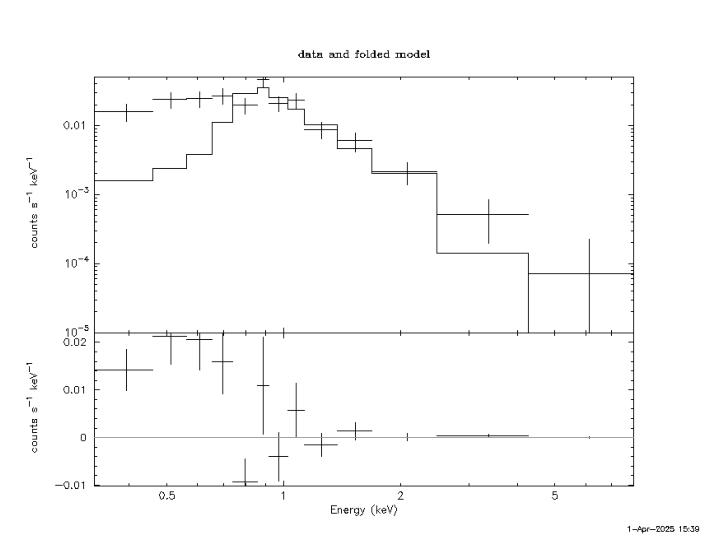

In [12]:
img = plt.imread(glob.glob('*Spectrum_apec.png')[0])
plt.imshow(img)
plt.axis('off')

### Powerlaw model
There are 3 parameters in the ``tbabs*powerlaw`` model. Here, Chi-squared = 11.6890 using 13 bins, so the **reduce Chi-squared = 1.16890**. The value is close to 1 meaning it is a good fit.

The value of the reduce Chi-squared is the closest to 1.

In [13]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_powerlaw = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              5.585924e+11     using 13 bins.

Test statistic : Chi-Squared              5.585924e+11     using 13 bins.
 Null hypothesis probability of 0.000000e+00 with 10 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
133.897      2.79346       0      0.225794       1.20736   4.19988e-06
109.514      909646       -1    0.00559230       1.64721   3.92890e-06
90.3329      2.04688e+06  -2      0.490441       5.52440   2.50347e-0

(-0.5, 856.5, 656.5, -0.5)

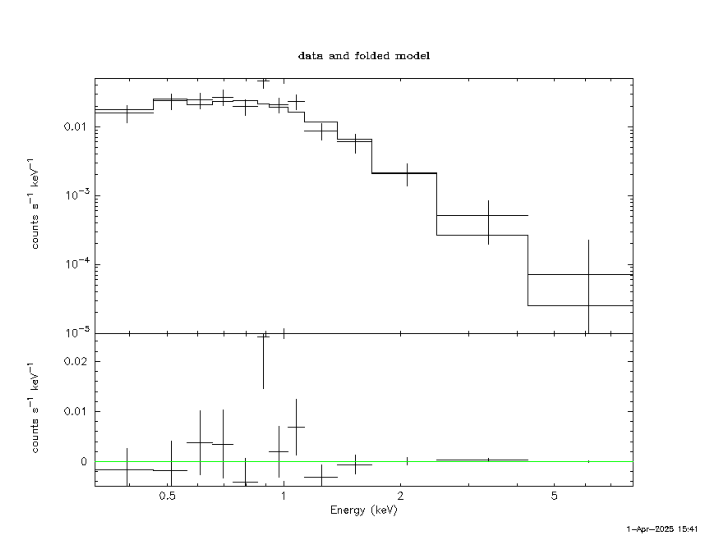

In [14]:
img = plt.imread(glob.glob('*Spectrum_powerlaw.png')[0])
plt.imshow(img)
plt.axis('off')

### Black body + Powerlaw model
There are 5 parameters in the ``tbabs*(bbody+powerlaw)`` model. Here, Chi-squared = 9.4570 using 13 bins, so the **reduce Chi-squared = 1.1821**. The value is close to 1 meaning it is a good fit.

The value of the reduce Chi-squared is the second closest to 1.

In [15]:
AllModels.clear()
mo = Model("tbabs*(bbody+powerlaw)")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bbodypowerlaw = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>(bbody<2> + powerlaw<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
   4    3   powerlaw   PhoIndex            1.00000      +/-  0.0          
   5    3   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              6.233100e+12     using 13 bins.

Test statistic : Chi-Squared              6.233100e+12     using 13 bins.
 Null hypothesis probability of 0.000000e+00 with 8 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm    4:PhoIndex        5:norm
136.881      275014   

(-0.5, 856.5, 659.5, -0.5)

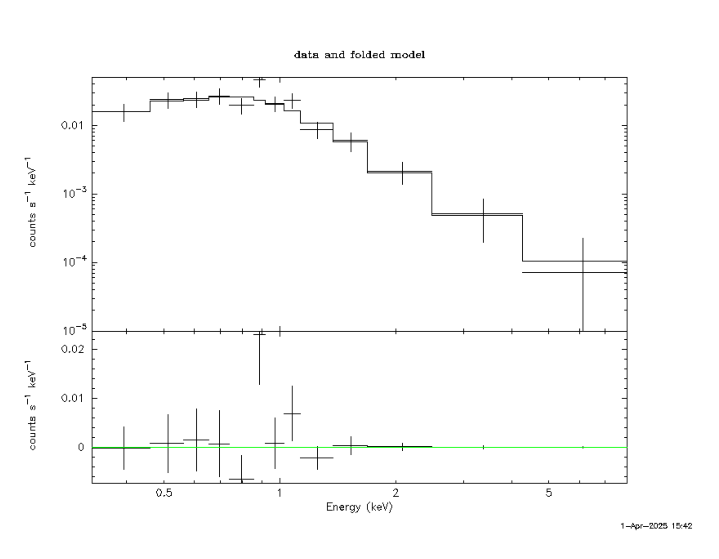

In [16]:
img = plt.imread(glob.glob('*Spectrum_bbodypowerlaw.png')[0])
plt.imshow(img)
plt.axis('off')

### Bremsstrahlung + Powerlaw model
There are 5 parameters in the ``tbabs*(bremss+powerlaw)`` model. Here, Chi-squared = 11.6890 using 13 bins, so the **reduce Chi-squared = 1.4611**. The value is close to 1 meaning it is a good fit.

In [17]:
AllModels.clear()
mo = Model("tbabs*(bremss+powerlaw)")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bremsspowerlaw = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>(bremss<2> + powerlaw<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
   4    3   powerlaw   PhoIndex            1.00000      +/-  0.0          
   5    3   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.012591e+12     using 13 bins.

Test statistic : Chi-Squared              1.012591e+12     using 13 bins.
 Null hypothesis probability of 0.000000e+00 with 8 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm    4:PhoIndex        5:norm
149.935      79168.7 

(-0.5, 855.5, 656.5, -0.5)

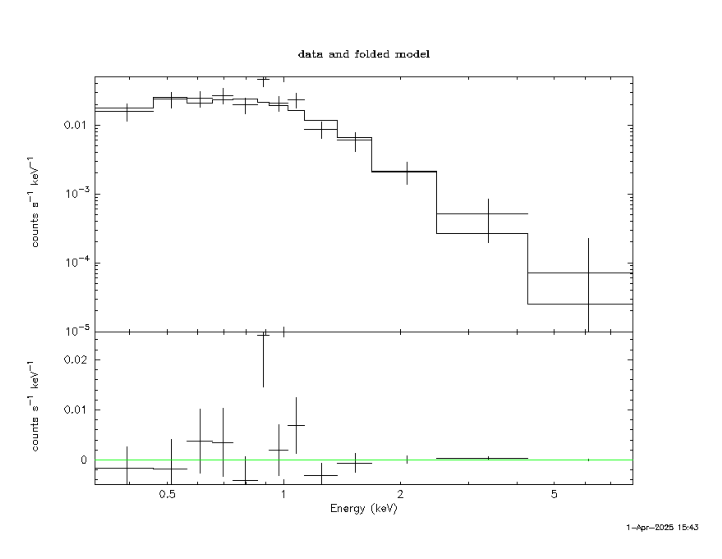

In [18]:
img = plt.imread(glob.glob('*Spectrum_bremsspowerlaw.png')[0])
plt.imshow(img)
plt.axis('off')

## Column density nH
### 3DNH-tool
http://astro.uni-tuebingen.de/nh3d/nhtool

**Sky coordinates (°) :**

- RA = 53.5942754°
- Dec = -28.9023933°

53.59 -28.90

**Column density :** nH = 3*10^20 cm^-2

In [19]:
print("The different models give a column density of :")
print()
print(color.BOLD+"bbody (Fourth best fit)"+color.END)
print(f"(tbabs) : {nH_bbody*10**22}")
print()
print(color.BOLD+"bremss (Third best fit)"+color.END)
print(f"(tbabs) : {nH_bremss*10**22}")
print()
print(color.BOLD+"apec"+color.END)
print(f"(tbabs) : {nH_apec*10**22}")
print()
print(color.BOLD+"powerlaw (Best fit)"+color.END)
print(f"(tbabs) : {nH_powerlaw*10**22}")
print()
print(color.BOLD+"bbody+powerlaw (Second best fit)"+color.END)
print(f"(tbabs) : {nH_bbodypowerlaw*10**22}")
print()
print(color.BOLD+"bremss+powerlaw"+color.END)
print(f"(tbabs) : {nH_bremsspowerlaw*10**22}")

The different models give a column density of :

bbody (Fourth best fit)
(tbabs) : 1.560091445178256e+20

bremss (Third best fit)
(tbabs) : 1.6759767648761875e+21

apec
(tbabs) : 5.738763807983382e+21

powerlaw (Best fit)
(tbabs) : 3.480922591438596e+21

bbody+powerlaw (Second best fit)
(tbabs) : 2.0325624320813016e+21

bremss+powerlaw
(tbabs) : 3.481278404785213e+21


## Flux
### X-ray flux
- X-ray flux of the best-fitting model ``Powerlaw``: **5.8718e-14  ergs/cm^2/s**.
- X-ray flux of the second best-fitting models ``Black body + Powerlaw``: **7.1013e-14 ergs/cm^2/s**.
- X-ray flux of the third best-fitting model ``Bremss``: **5.4522e-14 ergs/cm^2/s**.

In [20]:
Flux_pow = 5.8718e-14 # ergs/cm^2/s
Flux_bbp = 7.1013e-14 # ergs/cm^2/s
print(color.BOLD+"X-ray flux : "+color.END)
print(f"Powerlaw : F_x-ray = {Flux_pow} ergs/cm^2/s")
print(f"Black body + Powerlaw : F_x-ray = {Flux_bbp} ergs/cm^2/s")

X-ray flux : 
Powerlaw : F_x-ray = 5.8718e-14 ergs/cm^2/s
Black body + Powerlaw : F_x-ray = 7.1013e-14 ergs/cm^2/s


### Optical flux

In [21]:
def F_optical(mag):
    F0 = 1.05*10**(-5) # GAIA zero point magnitude
    return F0*10**(-0.4*mag)

G = 19.6951

F = F_optical(G)

print(color.BOLD+"Optical flux : "+color.END+f"F_optical = {F} ergs/cm^2/s")

Optical flux : F_optical = 1.390430542671063e-13 ergs/cm^2/s


### X-ray flux / Optical flux ratio

In [22]:
print(color.BOLD+"X-ray flux / Optical flux ratio : "+color.END)
print(f"Powerlaw : F_x-ray/F_optical = {Flux_pow/F} ergs/cm^2/s")
print(f"Black body + Powerlaw : F_x-ray/F_optical = {Flux_bbp/F} ergs/cm^2/s")

X-ray flux / Optical flux ratio : 
Powerlaw : F_x-ray/F_optical = 0.4223008499741438 ergs/cm^2/s
Black body + Powerlaw : F_x-ray/F_optical = 0.5107266981030327 ergs/cm^2/s


## Luminosity

In [23]:
"""GAIA"""

P_mas = 2.941 # Parallaxe en mas
d_kpc = 1/P_mas # Distance en kpc
d_cm = d_kpc*3.0857*10**21 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
Luminosity_pow = 4*np.pi*Flux_pow*(d_cm)**2 # erg/s
Luminosity_bbp = 4*np.pi*Flux_bbp*(d_cm)**2 # erg/s

print(color.BOLD+"(GAIA)"+color.END)
print(f"Distance : d = {d_cm} cm")
print(color.BOLD+"Luminosity : "+color.END)
print(f"Powerlaw : L_x-ray = {Luminosity_pow} ergs/cm^2/s")
print(f"Black body + Powerlaw : L_x-ray = {Luminosity_bbp} ergs/cm^2/s")

(GAIA)
Distance : d = 1.0492009520571234e+21 cm
Luminosity : 
Powerlaw : L_x-ray = 8.122663662274845e+29 ergs/cm^2/s
Black body + Powerlaw : L_x-ray = 9.823473460423099e+29 ergs/cm^2/s
